<a href="https://colab.research.google.com/github/urvi1703/ML-PROJECT/blob/main/Movie__Prediction2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [ ]:
movie_sample = pd.read_csv('/content/drive/MyDrive/Movie_Genre_Prediction/Movie_Genre_Prediction.zip (Unzipped Files)/sample_submission.csv')
movie_sample.head()

,id,genre
0,57609,action
1,30111,action
2,36119,action
3,65901,action
4,41910,action


In [ ]:
movie_sample['genre'].value_counts()

action    36000
Name: genre, dtype: int64

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Movie_Genre_Prediction/Movie_Genre_Prediction.zip (Unzipped Files)/test.csv')
print(test_df.shape)
test_df.head()

(36000, 4)


,id,movie_name,synopsis,genre
0,16863,A Death Sentence,"12 y.o. Ida's dad'll die without a DKK1,500,00...",action
1,48456,Intermedio,A group of four teenage friends become trapped...,action
2,41383,30 Chua Phai Tet,A guy left his home for 12 years till he came ...,action
3,84007,Paranoiac,A man long believed dead returns to the family...,action
4,40269,Ordinary Happiness,"After a deadly accident, Paolo comes back on E...",action


In [ ]:
test_df['genre'].value_counts()

action    36000
Name: genre, dtype: int64

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Movie_Genre_Prediction/Movie_Genre_Prediction.zip (Unzipped Files)/train.csv')
print(train_df.shape)
train_df.head()

(54000, 4)


,id,movie_name,synopsis,genre
0,44978,Super Me,A young scriptwriter starts bringing valuable ...,fantasy
1,50185,Entity Project,A director and her friends renting a haunted h...,horror
2,34131,Behavioral Family Therapy for Serious Psychiat...,This is an educational video for families and ...,family
3,78522,Blood Glacier,Scientists working in the Austrian Alps discov...,scifi
4,2206,Apat na anino,Buy Day - Four Men Widely - Apart in Life - By...,action


In [ ]:
train_df['genre'].value_counts()

fantasy      5400
horror       5400
family       5400
scifi        5400
action       5400
crime        5400
adventure    5400
mystery      5400
romance      5400
thriller     5400
Name: genre, dtype: int64

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54000 entries, 0 to 53999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54000 non-null  int64 
 1   movie_name  54000 non-null  object
 2   synopsis    54000 non-null  object
 3   genre       54000 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.6+ MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          36000 non-null  int64 
 1   movie_name  36000 non-null  object
 2   synopsis    36000 non-null  object
 3   genre       36000 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


In [ ]:
features = train_df['synopsis']
features.head()

0    A young scriptwriter starts bringing valuable ...
1    A director and her friends renting a haunted h...
2    This is an educational video for families and ...
3    Scientists working in the Austrian Alps discov...
4    Buy Day - Four Men Widely - Apart in Life - By...
Name: synopsis, dtype: object

In [ ]:
target = train_df['genre']
target.value_counts()

fantasy      5400
horror       5400
family       5400
scifi        5400
action       5400
crime        5400
adventure    5400
mystery      5400
romance      5400
thriller     5400
Name: genre, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(features, target,
                                                    test_size=0.2, random_state=2309, stratify=target)
X_train

47386    A ragtag spaceship crew sent on a rescue missi...
53524    An experimental film about various situations ...
28242    A series of loosely-connected shorts comprised...
46397    A gang of teenage girls, looking for kicks and...
12784    An FBI-trained neuropsychologist teams up with...
                               ...                        
18945    A jungle expedition in South America battles g...
25834    Balachandran who had to sacrifice his childhoo...
8044     A new, single, young doctor comes to town, tak...
50091    A series of killings against homosexual people...
38171    A young writer takes to edit the autobiography...
Name: synopsis, Length: 43200, dtype: object

In [ ]:
X_test = test_df['synopsis']
X_test.head()

0    12 y.o. Ida's dad'll die without a DKK1,500,00...
1    A group of four teenage friends become trapped...
2    A guy left his home for 12 years till he came ...
3    A man long believed dead returns to the family...
4    After a deadly accident, Paolo comes back on E...
Name: synopsis, dtype: object

In [ ]:
y_test = test_df['genre']
y_test.value_counts()

action    36000
Name: genre, dtype: int64

In [ ]:
X_train.shape, y_train.shape, X_validation.shape,  y_validation.shape, X_test.shape, y_test.shape

((43200,), (43200,), (10800,), (10800,), (36000,), (36000,))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer(stop_words='english', max_df=100)

count_vector.fit(X_train)
X_train_count_vector = count_vector.transform(X_train)
X_validation_count_vector = count_vector.transform(X_validation)
X_test_count_vector = count_vector.transform(X_test)

X_train_count_vector.shape, X_validation_count_vector.shape, X_test_count_vector.shape

((43200, 39892), (10800, 39892), (36000, 39892))

In [ ]:
X_test_count_vector.toarray()[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y_train

47386       horror
53524      fantasy
28242      fantasy
46397        crime
12784        scifi
           ...    
18945    adventure
25834      romance
8044       romance
50091        scifi
38171        crime
Name: genre, Length: 43200, dtype: object

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr = LogisticRegression(max_iter=5000)
lr.fit(X_train_count_vector, y_train)

# lr model estimation
validation_pred = lr.predict(X_validation_count_vector)
accuracy_score(y_validation, validation_pred)

0.2112962962962963

In [ ]:
# lr model prediction accuracy

test_lr_pred = lr.predict(X_test_count_vector)
accuracy_score(y_test, test_lr_pred)

0.09513888888888888

In [ ]:
# confusion_matrix

print(confusion_matrix(y_test, test_lr_pred))

[[3425 3412 3575 3562 3264 3834 3508 4483 3522 3415]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]


In [ ]:
# classification_report

print(classification_report(y_test, test_lr_pred))

              precision    recall  f1-score   support

      action       1.00      0.10      0.17     36000
   adventure       0.00      0.00      0.00         0
       crime       0.00      0.00      0.00         0
      family       0.00      0.00      0.00         0
     fantasy       0.00      0.00      0.00         0
      horror       0.00      0.00      0.00         0
     mystery       0.00      0.00      0.00         0
     romance       0.00      0.00      0.00         0
       scifi       0.00      0.00      0.00         0
    thriller       0.00      0.00      0.00         0

    accuracy                           0.10     36000
   macro avg       0.10      0.01      0.02     36000
weighted avg       1.00      0.10      0.17     36000



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

dtc.fit(X_train_count_vector, y_train)

# dtc model estimation
validation_pred = dtc.predict(X_validation_count_vector)
accuracy_score(y_validation, validation_pred)

0.1650925925925926

In [ ]:
# dtr model prediction accuracy

test_dtc_pred = dtc.predict(X_test_count_vector)
accuracy_score(y_test, test_dtc_pred)

0.10252777777777777

In [ ]:
# confusion_matrix

print(confusion_matrix(y_test, test_dtc_pred))

[[3691 3616 3658 3584 3173 3757 3235 3140 5555 2591]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]


In [ ]:
# classification_report

print(classification_report(y_test, test_dtc_pred))

              precision    recall  f1-score   support

      action       1.00      0.10      0.19     36000
   adventure       0.00      0.00      0.00         0
       crime       0.00      0.00      0.00         0
      family       0.00      0.00      0.00         0
     fantasy       0.00      0.00      0.00         0
      horror       0.00      0.00      0.00         0
     mystery       0.00      0.00      0.00         0
     romance       0.00      0.00      0.00         0
       scifi       0.00      0.00      0.00         0
    thriller       0.00      0.00      0.00         0

    accuracy                           0.10     36000
   macro avg       0.10      0.01      0.02     36000
weighted avg       1.00      0.10      0.19     36000



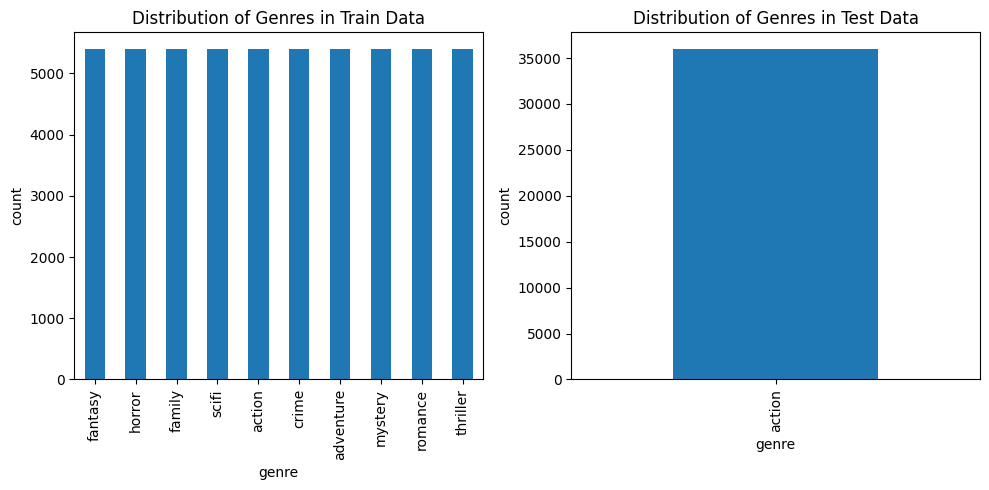

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
(train_df['genre'].value_counts()).plot(kind='bar')
plt.title('Distribution of Genres in Train Data')
plt.xlabel('genre')
plt.ylabel('count')


plt.subplot(1, 2, 2)
(test_df['genre'].value_counts()).plot(kind='bar')
plt.title('Distribution of Genres in Test Data')
plt.xlabel('genre')
plt.ylabel('count')

plt.tight_layout()
plt.show()

In [ ]:
train_genre_counts = train_df['genre'].value_counts()
test_genre_counts = test_df['genre'].value_counts()

#label for pie chart
train_labels = train_genre_counts.index
train_sizes = train_genre_counts.values

test_labels = test_genre_counts.index
test_sizes = test_genre_counts.values

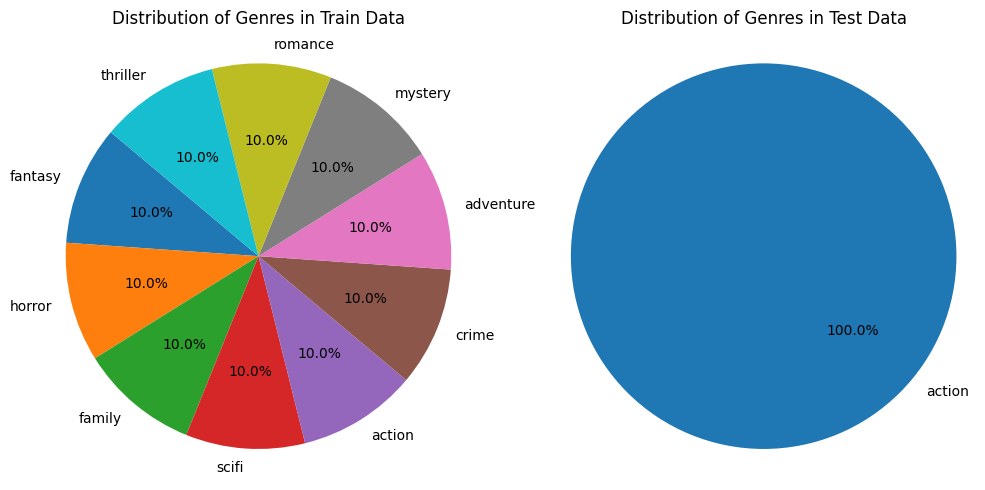

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.pie(train_sizes, labels=train_labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Genres in Train Data')

plt.subplot(1, 2, 2)
plt.pie(test_sizes, labels=test_labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Genres in Test Data')

plt.tight_layout()
plt.show()

In [ ]:
train_df['genre'] = train_df['genre'].map({
    'fantasy':0,
    'horror':1,
    'family':2,
    'scifi':3,
    'action':4,
    'crime':5,
    'adventure':6,
    'mystery':7,
    'romance':8,
    'thriller':9
})

train_df.head()

,id,movie_name,synopsis,genre
0,44978,Super Me,A young scriptwriter starts bringing valuable ...,0
1,50185,Entity Project,A director and her friends renting a haunted h...,1
2,34131,Behavioral Family Therapy for Serious Psychiat...,This is an educational video for families and ...,2
3,78522,Blood Glacier,Scientists working in the Austrian Alps discov...,3
4,2206,Apat na anino,Buy Day - Four Men Widely - Apart in Life - By...,4


In [ ]:
train_df.genre.value_counts()

0    5400
1    5400
2    5400
3    5400
4    5400
5    5400
6    5400
7    5400
8    5400
9    5400
Name: genre, dtype: int64

In [ ]:
for i in  train_df.columns:
    print(i)
    print(train_df[i].unique())
    print("------------------")

id
[44978 50185 34131 ... 69801  7678 33970]
------------------
movie_name
['Super Me' 'Entity Project'
 'Behavioral Family Therapy for Serious Psychiatric Disorders' ...
 'The Great Swindle' 'When Men Get Pregnant' 'Suttu Pidikka Utharavu']
------------------
synopsis
['A young scriptwriter starts bringing valuable objects back from his short nightmares of being chased by a demon. Selling them makes him rich.'
 'A director and her friends renting a haunted house to capture paranormal events in order to prove it and become popular.'
 'This is an educational video for families and family therapists that describes the Behavioral Family Therapy approach to dealing with serious psychiatric illnesses.'
 ...
 'A seductive woman gets involved in relationships with several people. All of the characters play games of deceit with one another and things get more and more dangerous.'
 'Duyen, a wedding dress staff, who decides to continue a pregnancy despite Hung, her lover advising her to have an

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(train_df.drop('genre', axis=1),
                                                    train_df['genre'],
                                                    test_size=0.2,
                                                    random_state=42)

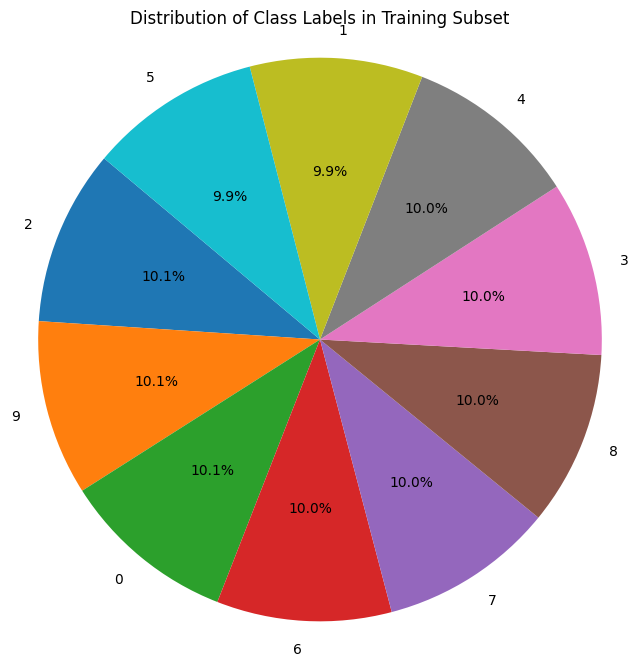

In [ ]:
class_distribution = y_train.value_counts()

plt.figure(figsize=(8, 8))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Class Labels in Training Subset')
plt.show()

In [ ]:
train_df.head()

,id,movie_name,synopsis,genre
0,44978,Super Me,A young scriptwriter starts bringing valuable ...,0
1,50185,Entity Project,A director and her friends renting a haunted h...,1
2,34131,Behavioral Family Therapy for Serious Psychiat...,This is an educational video for families and ...,2
3,78522,Blood Glacier,Scientists working in the Austrian Alps discov...,3
4,2206,Apat na anino,Buy Day - Four Men Widely - Apart in Life - By...,4
